# **Task 1 Problem**



our task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.

1. Understand the data
2. Transform categorical variables to the numerical variables
3. Apply linear regression to predict the CTC
4. Evaluate the results of the analysis

Excel data files are provided to you to help you with the assignment.

Test_Data_file is a dataset that you will use to test your model and find out the Mean Square Value.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Acquistion**

In [ ]:
train = pd.read_excel("/content/Data_file.xlsx", header=2, index_col = 0)

**Read The First 5 Row**

In [ ]:
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


# **Detailed Description**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


In [ ]:
train.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [ ]:
train.describe(include="object")

,College,Role,City type
count,1338,1338,1338
unique,3,2,2
top,Tier 1,Executive,Metro
freq,649,1064,676


# **Plot Observation**

1. Categorical Variables like College, Role, City type

2. No Null Values

**Exploratory Data Analysis (EDA)**

<ipython-input-46-411c8b64674c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


ValueError: ignored

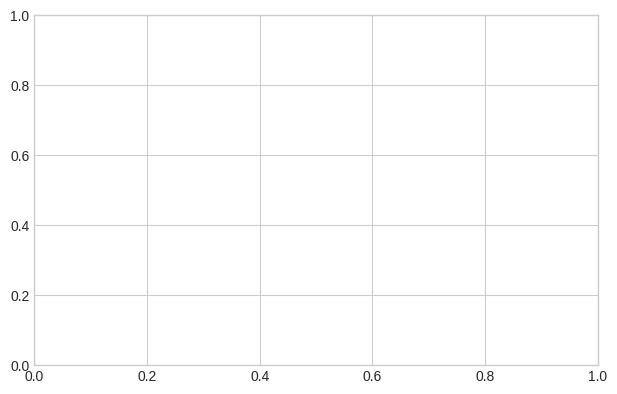

In [ ]:
#UNIVARIATE aNALYSIS
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('seaborn-whitegrid')

plt.subplot(2,2,1)
sns.countplot(x="Role", data=train)

plt.subplot(2,2,2)
sns.countplot(x="College", data=train)

plt.subplot(2,2,3)
sns.countplot(x="City type", data=train)

plt.subplot(2,2,4)
sns.countplot(x="Previous job changes", data=train)


<ipython-input-12-bbb564bb4783>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'City Type\n')

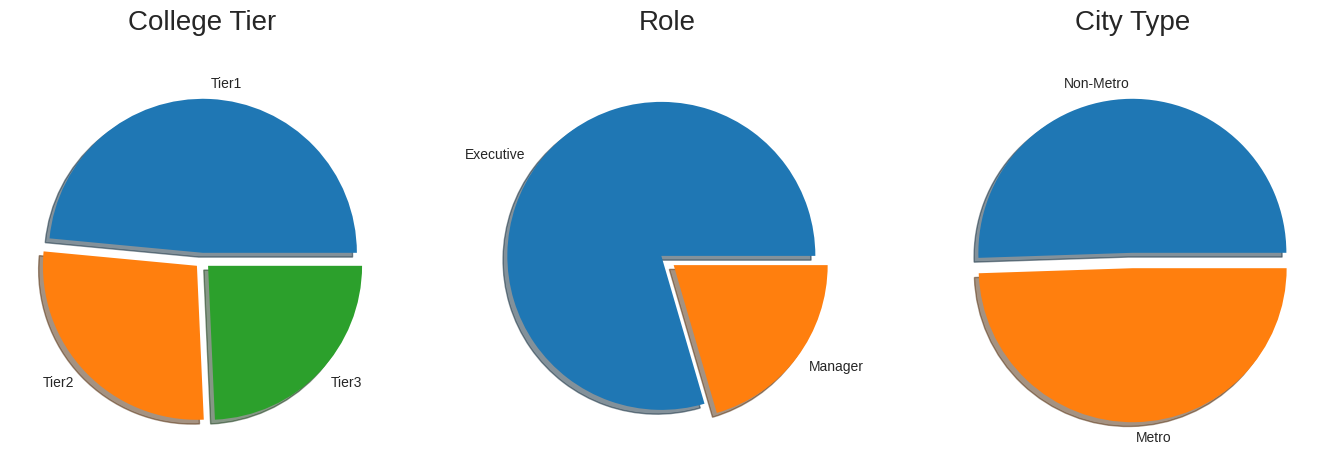

In [ ]:
plt.rcParams['figure.figsize'] = (17,5)
plt.style.use('seaborn-whitegrid')

plt.subplot(1,3,1)
plt.pie(x=train.College.value_counts(), labels=["Tier1", "Tier2", "Tier3"], shadow=True, explode=[0.05,0.05,0.05])
plt.title('College Tier\n', fontsize=20)

plt.subplot(1,3,2)
plt.pie(x=train.Role.value_counts(), labels=["Executive", "Manager"], shadow=True, explode=[0.05,0.05])
plt.title('Role\n', fontsize=20)

plt.subplot(1,3,3)
plt.pie(x=train['City type'].value_counts(), labels=["Non-Metro", "Metro"], shadow=True, explode=[0.05,0.05])
plt.title('City Type\n', fontsize=20)

**Bivariate Analysis**

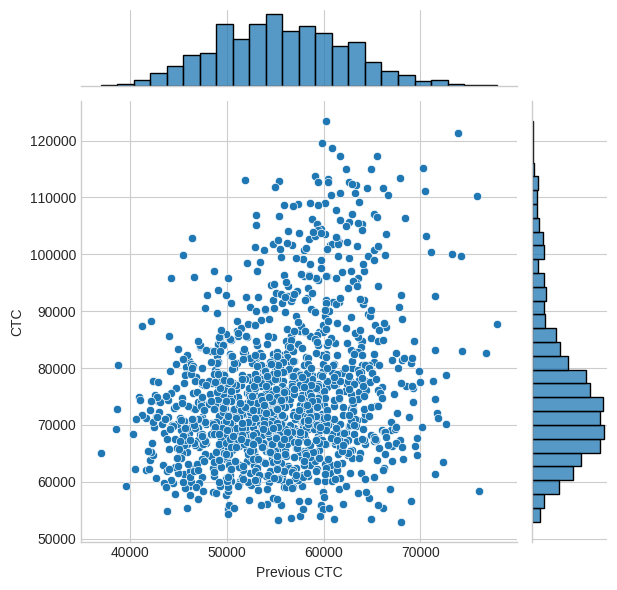

In [ ]:
sns.jointplot(x='Previous CTC', y='CTC', data=train)

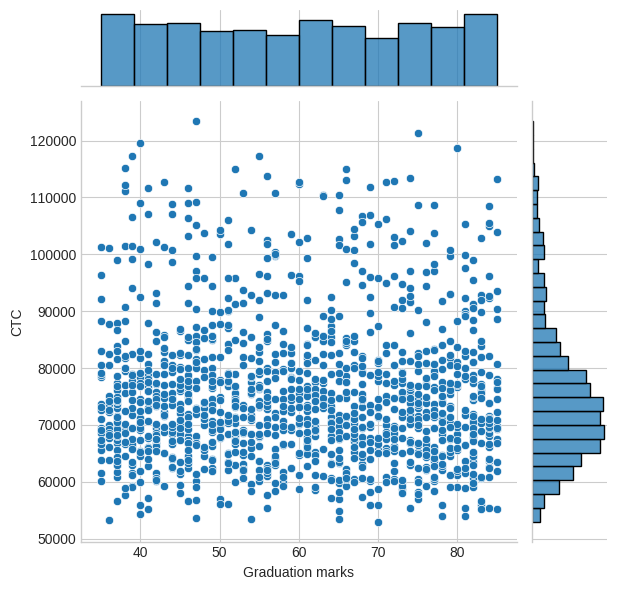

In [ ]:
sns.jointplot(x='Graduation marks', y='CTC', data=train)

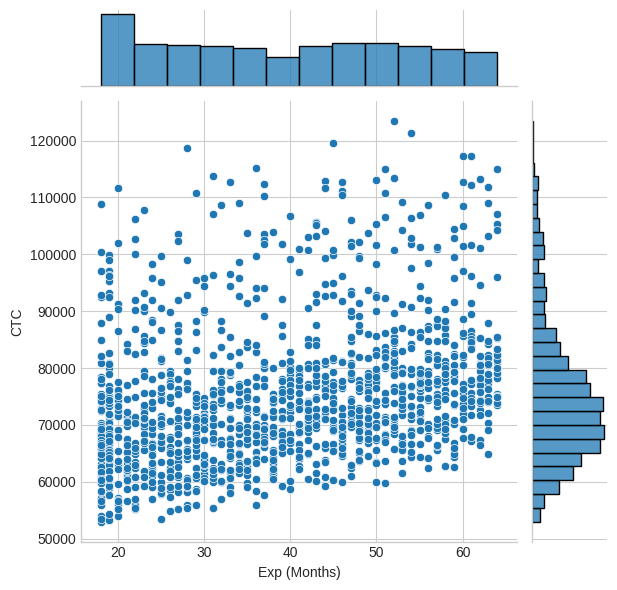

In [ ]:
sns.jointplot(x='Exp (Months)', y='CTC', data=train)

**Observation**

In [ ]:
print(train['Role'].value_counts(), train['College'].value_counts(), train['City type'].value_counts(), sep='\n\n\n')

Executive    1064
Manager       274
Name: Role, dtype: int64


Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64


Metro        676
Non-Metro    662
Name: City type, dtype: int64


**Create Fake/Dummy Values **

In [ ]:
train = pd.get_dummies(train, columns=['College', 'Role', 'City type'])

In [ ]:
train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
S.No.,,,,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,0,0,1,0,1
2,57081,1,84,18,68005.870631,0,1,0,1,0,1,0
3,60347,2,52,28,76764.020277,0,1,0,1,0,1,0
4,49010,2,81,33,82092.386880,0,0,1,1,0,1,0
5,57879,4,74,32,73878.097729,0,0,1,1,0,1,0


In [ ]:
del train['College_Tier 3']
del train['Role_Executive']
del train['City type_Non-Metro']

In [ ]:
train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
S.No.,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,1,0
2,57081,1,84,18,68005.870631,0,1,0,1
3,60347,2,52,28,76764.020277,0,1,0,1
4,49010,2,81,33,82092.386880,0,0,0,1
5,57879,4,74,32,73878.097729,0,0,0,1


In [ ]:
test = pd.read_excel("/content/Test_data_file.xlsx",header=0)

In [ ]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del test['Role']
del test['City type']
del test['College']

In [ ]:
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,0,1,0,55523,3,66,19,71406.576531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,1,57081,1,84,18,68005.870631,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,0,1,0,1,60347,2,52,28,76764.020277,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,1,49010,2,81,33,82092.386880,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,1,57879,4,74,32,73878.097729,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.rename(columns={'College_Tier 1': 'College_T1', 'College_Tier 2': 'College_T2', 'City type_Metro': 'City_Metro', 'Previous CTC': 'previous CTC', 'Previous job changes': 'previous job changes', 'Exp (Months)': 'Exp', 'CTC': 'Actual CTC'}, inplace=True)

In [ ]:
train.head()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_T1,College_T2,Role_Manager,City_Metro
S.No.,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,1,0
2,57081,1,84,18,68005.870631,0,1,0,1
3,60347,2,52,28,76764.020277,0,1,0,1
4,49010,2,81,33,82092.386880,0,0,0,1
5,57879,4,74,32,73878.097729,0,0,0,1


In [ ]:
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,0,1,0,55523,3,66,19,71406.576531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,1,57081,1,84,18,68005.870631,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,0,1,0,1,60347,2,52,28,76764.020277,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,1,49010,2,81,33,82092.386880,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,1,57879,4,74,32,73878.097729,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Y_Test = test['Actual CTC']


In [ ]:
test = test[['previous CTC', 'previous job changes', 'Graduation marks', 'Exp', 'College_T1', 'College_T2', 'Role_Manager', 'City_Metro' ]]

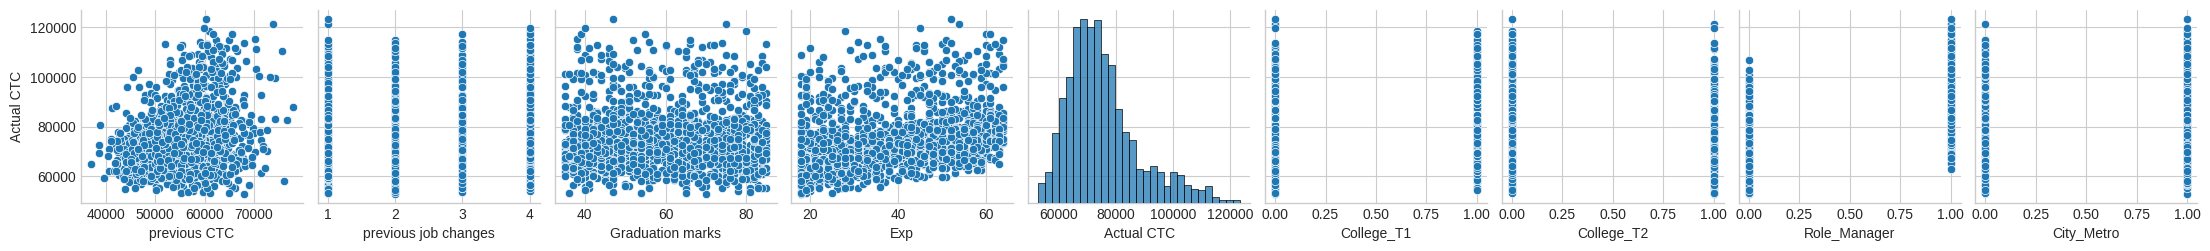

In [ ]:
sns.pairplot(train, y_vars='Actual CTC')

In [ ]:
train.corr()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_T1,College_T2,Role_Manager,City_Metro
previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260,-0.090043,0.232138,0.021208,0.036956
previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518,0.037294,0.008599,-0.013131,-0.001568
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557,0.015750,0.010571,0.014541,0.018550
Exp,0.117035,0.034137,-0.065412,1.000000,0.301569,0.010716,-0.011642,-0.025019,-0.020856
Actual CTC,0.270260,0.007518,-0.017557,0.301569,1.000000,0.165249,-0.041814,0.625435,0.211258
College_T1,-0.090043,0.037294,0.015750,0.010716,0.165249,1.000000,-0.593313,-0.029292,-0.005669
College_T2,0.232138,0.008599,0.010571,-0.011642,-0.041814,-0.593313,1.000000,0.068498,0.017117
Role_Manager,0.021208,-0.013131,0.014541,-0.025019,0.625435,-0.029292,0.068498,1.000000,0.076185
City_Metro,0.036956,-0.001568,0.018550,-0.020856,0.211258,-0.005669,0.017117,0.076185,1.000000


**Model Training**

In [ ]:
train.shape

(1338, 9)

In [ ]:
X=train.drop(columns=['Actual CTC'])
Y = train['Actual CTC']

In [ ]:
print("Shape of X table: ", X.shape, "\t", 'Shape of Y matrix: ', Y.shape, 'Shape of Y_test matrix: ', Y_Test.shape)

Shape of X table:  (1338, 8) 	 Shape of Y matrix:  (1338,) Shape of Y_test matrix:  (1338,)


In [ ]:
X.columns

Index(['previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'College_T1', 'College_T2', 'Role_Manager', 'City_Metro'],
      dtype='object')

In [ ]:
test.columns

Index(['previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'College_T1', 'College_T2', 'Role_Manager', 'City_Metro'],
      dtype='object')

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **Model Evaluation**

In [ ]:
mean_squared_error(Y_Test, model.predict(test))

61677937.04530962